In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
%config InlineBackend.figure_format = 'svg'

In [4]:
Types = ["Aligned", "Shifted","Disk", "Rot30", ]
Paths = ["Aligned", "Shifted","Disk", "Rotated"]

data = []
meta = []
tot_tracks = []

# Load the data into a dataframe
for index, t in enumerate(Types):
    print("Loading type: ", t)
    data.append(pd.read_csv(f"../Files/{Paths[index]}/EventInfo_merge_{t}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"]))
    
    # Cut the first time bin
    data[index] = data[index][data[index]['t'] > 200]
    
    # Apply a radial cut
    # rad_cut = data[index][ np.sqrt(data[index]['x']*data[index]['x'] + data[index]['y']*data[index]['y']) >= 0.15]['event'].unique()
    # data[index] = data[index][~data[index].event.isin(rad_cut)]

    tot_tracks.append(len(data[index]['event'].unique()))

    # Load the data into a dataframe
    # if (t == "Rot30"):
    #     meta.append(pd.read_csv(f"../Files/{Paths[index]}/Metadata_merge_{t}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z"]))
    # else:
    meta.append(pd.read_csv(f"../Files/{Paths[index]}/Metadata_merge_{t}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z", "start E", "end E"]))

Loading type:  Aligned
Loading type:  Shifted
Loading type:  Disk
Loading type:  Rot30


In [5]:
# Print some additional info
for index, t in enumerate(Types):
    print(t)
    print("Mean VuV: ", meta[index]['excitation'].mean())
    print("STD/Mean VuV: ", 100*meta[index]['excitation'].std()/meta[index]['excitation'].mean())
    print("\n")

Aligned
Mean VuV:  1134.4842513770657
STD/Mean VuV:  3.842426886801796


Shifted
Mean VuV:  1222.334392196098
STD/Mean VuV:  2.0638443436637197


Disk
Mean VuV:  1234.059875
STD/Mean VuV:  1.2905939300043228


Rot30
Mean VuV:  1003.7571
STD/Mean VuV:  20.00473129748207




In [6]:
# Bin the scatters in time
tmin=0
tmax=6000
tbw=200


tbins = np.arange(tmin, tmax+tbw, tbw)
tbins_centre = np.arange(tmin+tbw/2, tmax+tbw/2, tbw)

avg = []
std = []

for index, t in enumerate(Types):
    data[index]['t'] = pd.cut(x=data[index]['t'], bins=tbins,labels=tbins_centre, include_lowest=True)

    # Now average over the events
    avg.append(data[index].groupby(['t']).count())
    avg[index] = avg[index].fillna(0)
    avg[index].reset_index(inplace=True) 

    std.append(data[index].groupby(['t']).std())
    std[index] = std[index].fillna(0)
    std[index].reset_index(inplace=True) 


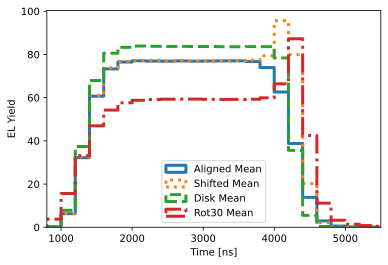

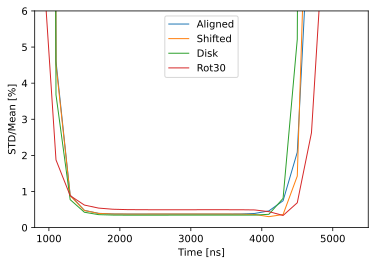

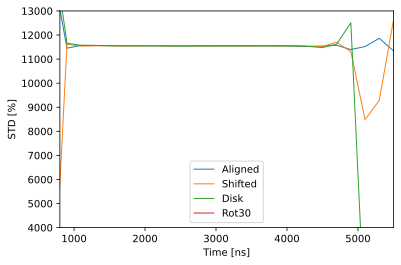

In [15]:
# Make a plot of the timing profile of the EL emission
from matplotlib.lines import lineStyles

vlines = ["solid", "dotted", "dashed", "dashdot"]

plt.figure()
for index, t in enumerate(Types):
    plt.hist(avg[index]['t'], weights = avg[index]['event']/tot_tracks[index],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", linewidth=3,linestyle=vlines[index], label=f"{Types[index]} Mean")

plt.xlim(-200, 6200)
plt.xlim(800, 5500 )

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
plt.legend(loc = 'lower center')
plt.savefig("../Plots/Combined/Yield_vs_Time.pdf")

plt.figure()
for index, t in enumerate(Types):
    plt.plot(avg[index]['t'], 100*std[index]['event']/avg[index]['event'], linewidth=1, label=Types[index])
plt.xlabel("Time [ns]")
plt.ylabel("STD/Mean [%]")
plt.xlim(-200, 6200)
plt.ylim(0, 6 )
plt.xlim(800, 5500 )
plt.legend(loc = "upper center")
plt.savefig("../Plots/Combined/Fluctuations_vs_Time.pdf")

plt.figure()
for index, t in enumerate(Types):
    plt.plot(avg[index]['t'], std[index]['event'], linewidth=1, label=Types[index])
plt.xlabel("Time [ns]")
plt.ylabel("STD [%]")
plt.xlim(-200, 6200)
plt.xlim(800, 5500 )
plt.ylim(4000, 13000 )
plt.legend(loc = "lower center")
plt.savefig("../Plots/Combined/Fluctuations_vs_Time.pdf")


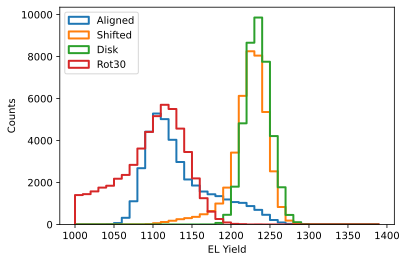

In [8]:
data_align_tot = []

plt.figure()

# Plot the total EL yield for each configuration
for index, t in enumerate(Types):
    data_align_tot.append(data[index].pivot_table(columns=['event'], aggfunc='size').reset_index())
    data_align_tot[index].columns = ['event', 'Yield']
    plt.hist(data_align_tot[index]['Yield'], bins = np.arange(1000, 1400, 10), histtype="step", linewidth=2, label=Types[index] )

plt.xlabel("EL Yield")
plt.ylabel("Counts")
plt.legend(loc = 'upper left')
plt.savefig("../Plots/Combined/YieldTotal.pdf")


0        6.429476
1        8.201021
2        1.816021
3        1.955001
4        4.673224
           ...   
39935    5.314994
39936    6.265978
39937    2.706919
39938    4.348854
39939    7.769379
Name: end E, Length: 39940, dtype: float64

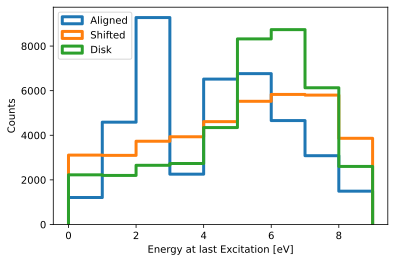

In [9]:
# Plot the energies of the events
plt.figure()

display(meta[0]['end E'])

# Plot the total EL yield for each configuration
for index, t in enumerate(Types):
    if (index == 3): continue;
    plt.hist(meta[index]['end E'], bins = np.arange(0, 10, 1), histtype="step", linewidth=3, label=Types[index] )

plt.xlabel("Energy at last Excitation [eV]")
plt.ylabel("Counts")
plt.legend(loc = 'upper left')
plt.savefig("../Plots/Combined/EndEnergy.pdf")